In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
X = pd.read_csv('train.csv', sep=',')
pd.set_option('display.max_rows', 10)
X = X.drop('id', axis=1)

In [3]:
Y = X.copy()
Y

,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП,Погибло,Погибло детей,Ранено,Ранено детей
0,13.07.2018,17:35:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,88,NaN,NaN,NaN,Столкновение,0,0,0,0
1,11.05.2018,17:10:00,"Новгородская область, Великий Новгород",Большая Санкт-Петербургская ул,73,NaN,NaN,NaN,Столкновение,0,0,0,0
2,25.01.2020,14:44:00,"Новгородская область, Великий Новгород",Хутынская ул,29,NaN,NaN,NaN,NaN,0,0,0,0
3,11.05.2020,11:30:00,"Новгородская область, Новгородский район, Сави...",Вишнёвая ул,4,NaN,NaN,NaN,NaN,0,0,0,0
4,09.01.2019,01:45:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,430.0,5.0,Иной вид ДТП,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,15.05.2019,07:35:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Столкновение,0,0,0,0
35767,15.10.2019,08:45:00,"Новгородская область, Великий Новгород",Пестовская ул,1,NaN,NaN,NaN,Столкновение,0,0,0,0
35768,10.03.2019,09:00:00,"Новгородская область, Старорусский район, Стар...",NaN,NaN,NaN,NaN,NaN,Наезд на стоящее ТС,0,0,0,0
35769,13.09.2020,05:40:00,"Новгородская область, Новгородский район",NaN,NaN,"""Россия"" Москва - Тверь - Великий Новгород - С...",544.0,870.0,NaN,0,0,0,0


In [4]:
for i, col in enumerate(X.columns):
    Y = Y.drop([X.columns[i]], axis=1)
    if i == 8:
        break
Y

,Погибло,Погибло детей,Ранено,Ранено детей
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
35766,0,0,0,0
35767,0,0,0,0
35768,0,0,0,0
35769,0,0,0,0


# Преобразование значений столбцов

## Дата 

In [5]:
season = [] 
day_month = [] 
months = [] 
year = []
for i, x in enumerate(X['Дата']):
    day = int(x[:2])
    month = int(x[3:5])
    day_month.append(day)
    months.append(month)
    season.append(month // 3 % 4 + 1)
    year.append(int(x[-4:]))


df = pd.DataFrame(season, columns=['season'])
df['day_month'] = day_month
df['months'] = months
df['year'] = year
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year
0,3,13,7,2018
1,2,11,5,2018
2,1,25,1,2020
3,2,11,5,2020
4,1,9,1,2019
...,...,...,...,...
35766,2,15,5,2019
35767,4,15,10,2019
35768,2,10,3,2019
35769,4,13,9,2020


# Время

### с 4 до 11 часов - 1
### с 11 до 17 часов - 2
### с 17 до 22 часов - 3
### с 22 до 4 часов - 4

In [6]:
times_of_day = []
hours = []
minutes = []
dict_times = {1: 4,         2: 4,         3: 4,         4: 1,
              5: 1,         6: 1,         7: 1,         8: 1,
              9: 1,        10: 1,        11: 2,        12: 2,
             13: 2,        14: 2,        15: 2,        16: 2,
             17: 3,        18: 3,        19: 3,        20: 3,
             21: 3,        22: 4,        23: 4,         0: 4}

for i, x in enumerate(X['Время']):
    times_of_day.append(dict_times[int(x[:2])])
    hours.append(int(x[:2]))
    minutes.append(int(x[3:5]))
    
df['times_of_day'] = times_of_day  
df['hours'] = hours  
df['minutes'] = minutes
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes
0,3,13,7,2018,3,17,35
1,2,11,5,2018,3,17,10
2,1,25,1,2020,2,14,44
3,2,11,5,2020,2,11,30
4,1,9,1,2019,4,1,45
...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35
35767,4,15,10,2019,1,8,45
35768,2,10,3,2019,1,9,0
35769,4,13,9,2020,1,5,40


# Зависимость вида ДТП от времени суток

In [7]:
count = [[0 for i in range(24)] for j in range(18)]
# dict_ = {}
# names = pd.unique(X['Вид ДТП'])
# for i, name in enumerate(names):
#     dict_[name] = i

dict_acc = {'Столкновение':18,
         'nan':17,
         'Наезд на препятствие':16,
         'Наезд на пешехода':15,
         'Наезд на стоящее ТС':14,
         'Опрокидывание':13,
         'Съезд с дороги':12,
         'Наезд на велосипедиста':11,
         'Иной вид ДТП':10,
         'Падение пассажира':9,
         'Наезд на животное':8,
         'Отбрасывание предмета (отсоединение колеса)':7,
         'Наезд на внезапно возникшее препятствие':6,
         'Падение груза':5,
         'Наезд на лицо, не являющееся участником дорожного движения (иного участника ДТП), осуществляющее производство работ':4,
         'Наезд на лицо, не являющееся участником дорожного движения (иного участника ДТП), осуществляющее какую-либо другую деятельность':3,
         'Возгорание вследствие технической неисправности движущегося или остановившегося ТС, участвующего в дорожном движении':2,
         'Наезд на лицо, не являющееся участником дорожного движения (иного участника ДТП), осуществляющее несение службы':1
        }
names = list(dict_acc.keys())
accidents = []

for i, [x1, x2] in enumerate(zip(X['Вид ДТП'], X['Время'])):
    n = dict_acc[str(x1)]
    m = int(x2[:2])
    count[len(count) - n][m] += 1
    accidents.append(n)

    
for i in range(len(count)):
    print(names[i], count[i], max(count[i]), count[i].index(max(count[i])))

Столкновение [117, 55, 68, 60, 49, 60, 104, 498, 889, 642, 685, 854, 914, 899, 942, 858, 855, 1199, 841, 674, 534, 391, 275, 186] 1199 17
nan [207, 123, 71, 97, 86, 96, 135, 355, 515, 434, 528, 616, 686, 724, 729, 686, 604, 748, 689, 584, 457, 380, 360, 306] 748 17
Наезд на препятствие [139, 110, 85, 78, 75, 111, 93, 114, 126, 186, 234, 275, 279, 232, 211, 266, 216, 250, 198, 203, 168, 187, 176, 168] 279 12
Наезд на пешехода [26, 11, 10, 9, 9, 7, 23, 57, 71, 26, 71, 18, 50, 60, 33, 33, 55, 81, 87, 115, 69, 47, 27, 28] 115 19
Наезд на стоящее ТС [99, 43, 48, 41, 38, 29, 51, 100, 189, 209, 266, 227, 294, 307, 230, 259, 272, 266, 237, 248, 183, 139, 123, 94] 307 13
Опрокидывание [11, 13, 6, 9, 15, 14, 22, 21, 25, 43, 35, 28, 24, 34, 50, 44, 27, 18, 12, 42, 27, 36, 14, 15] 50 14
Съезд с дороги [29, 41, 20, 14, 26, 30, 26, 45, 50, 43, 41, 47, 47, 46, 52, 44, 58, 44, 57, 49, 57, 24, 37, 32] 58 16
Наезд на велосипедиста [3, 5, 0, 0, 0, 0, 1, 9, 5, 11, 12, 15, 22, 10, 35, 10, 17, 34, 37, 26, 2

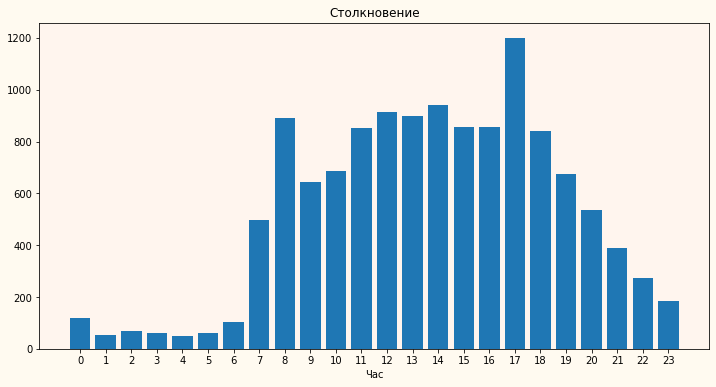

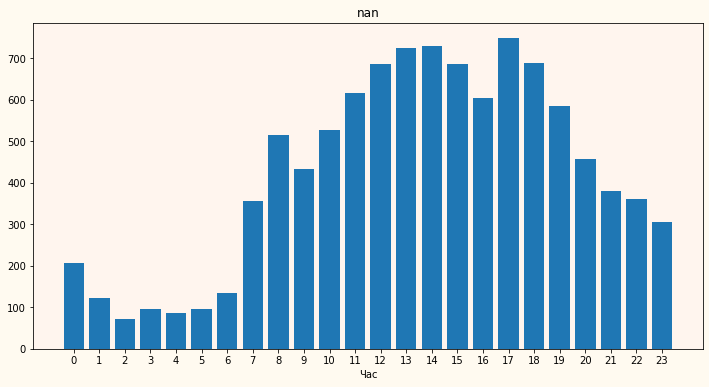

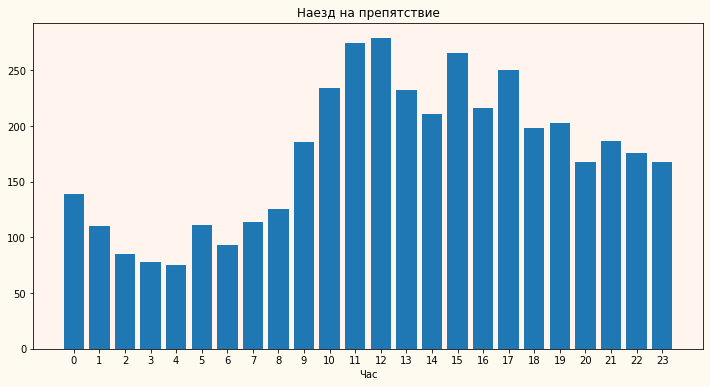

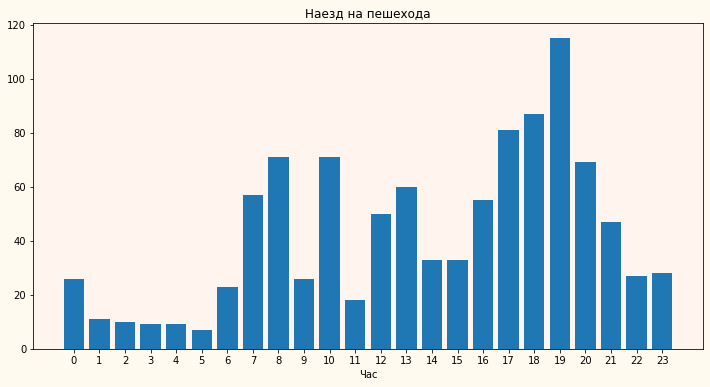

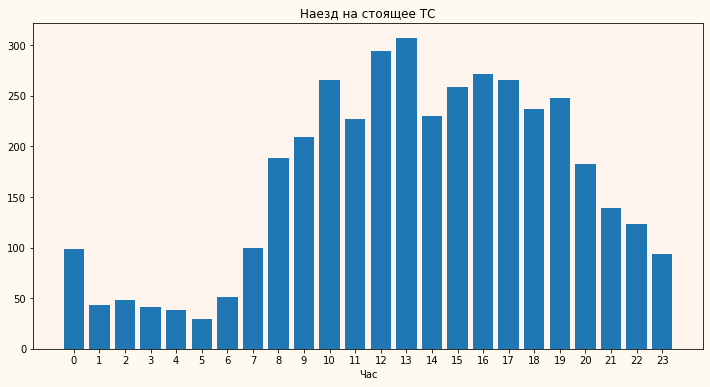

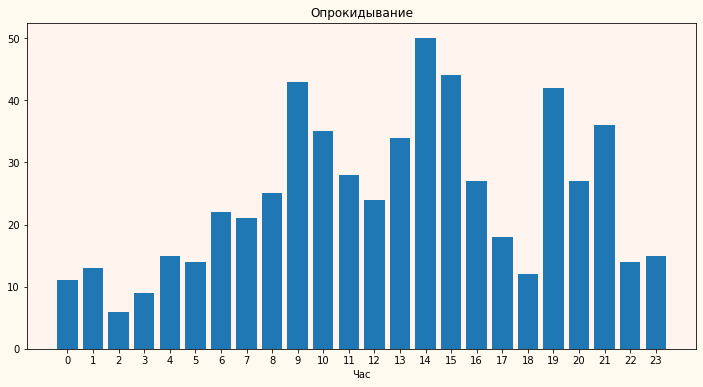

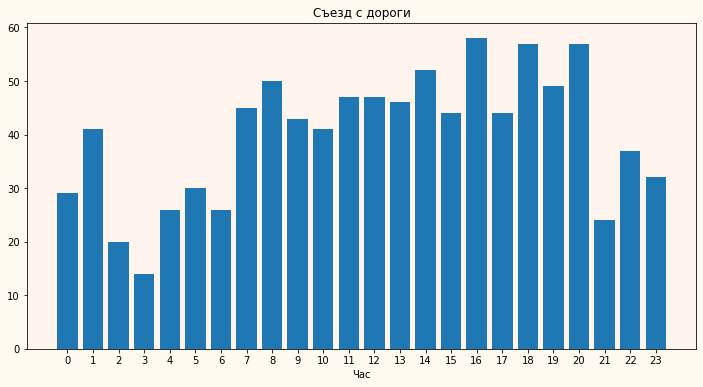

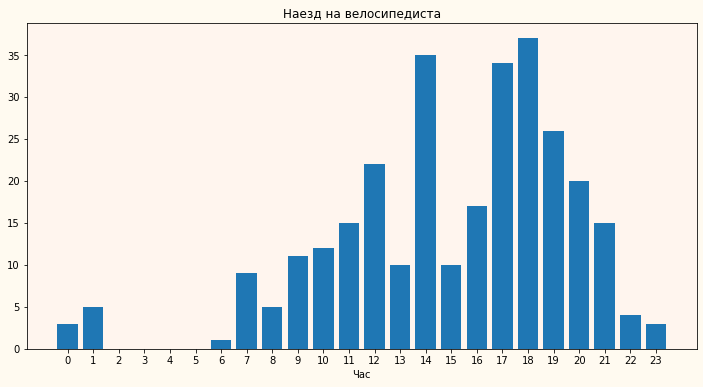

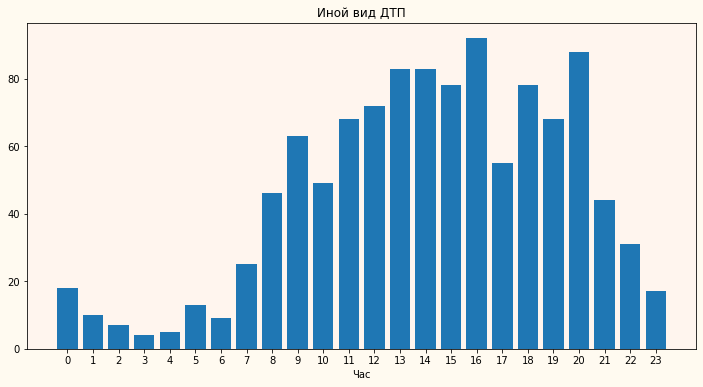

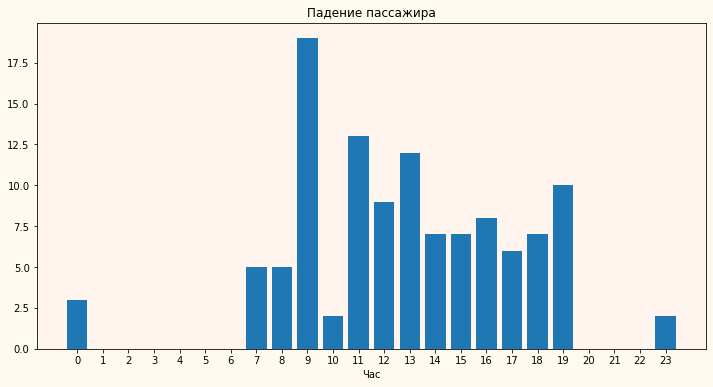

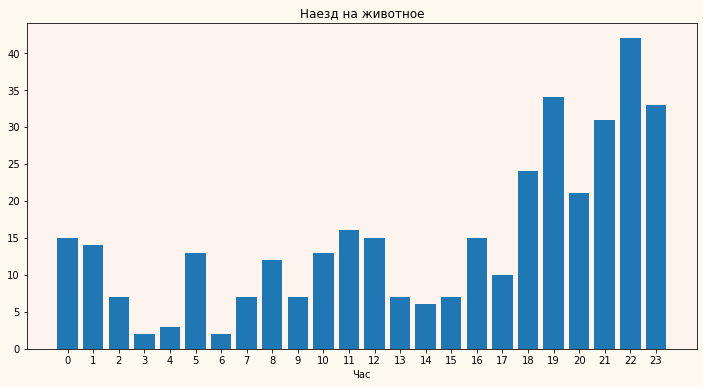

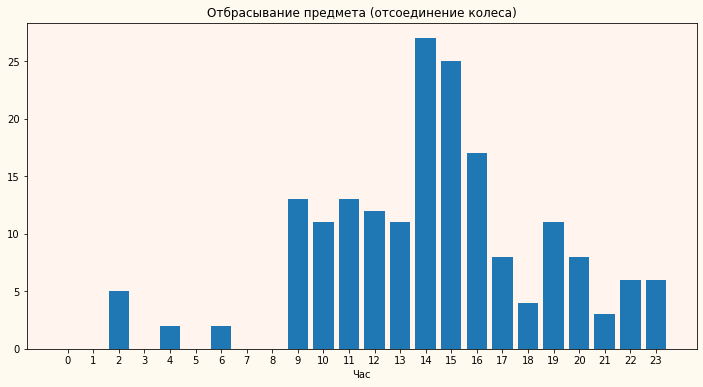

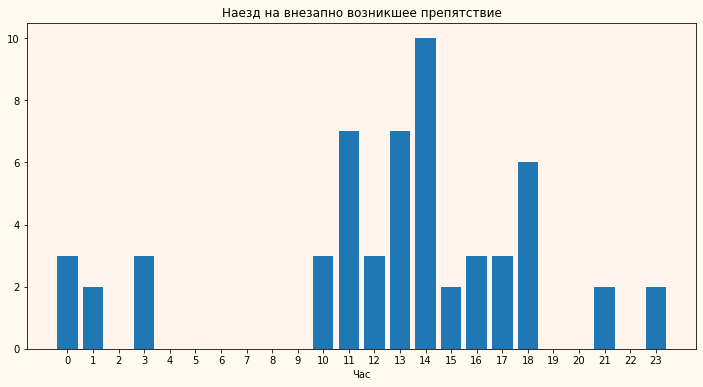

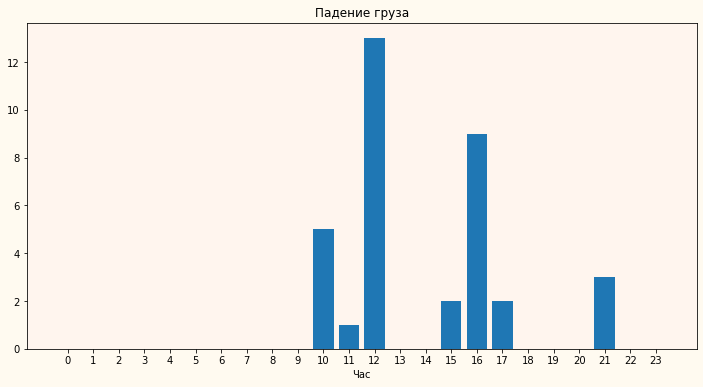

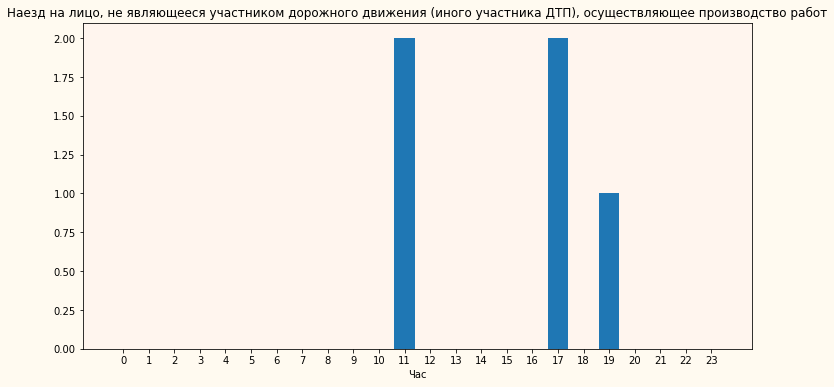

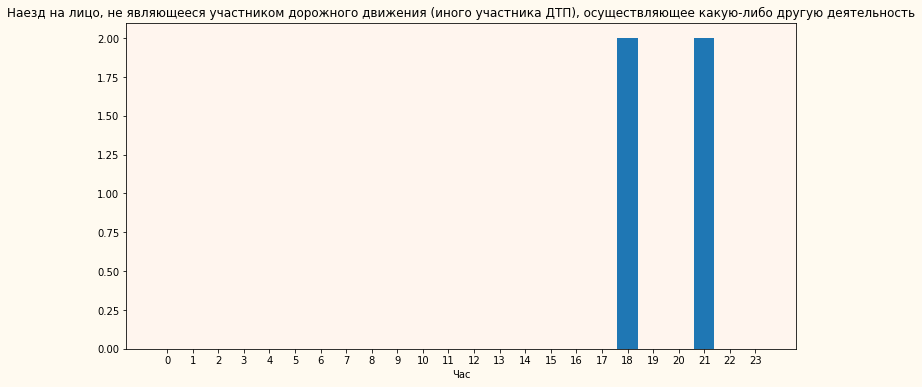

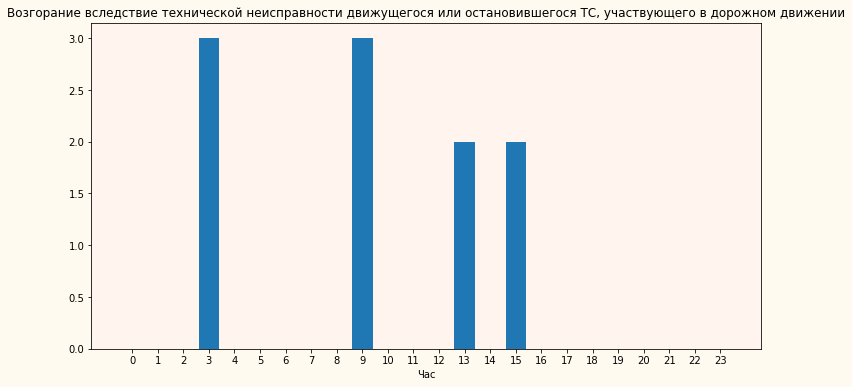

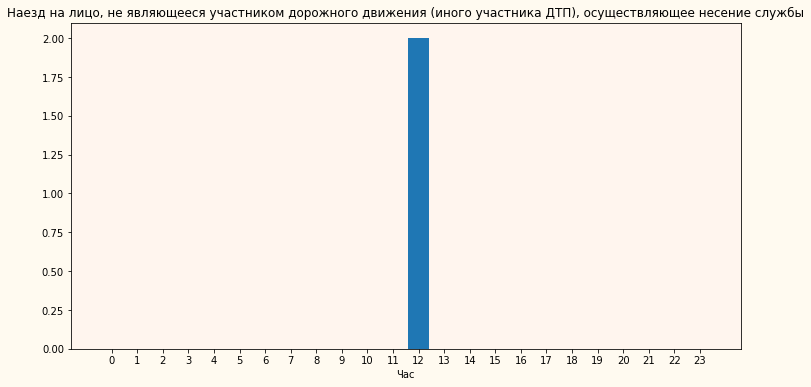

In [8]:
import numpy as np

accident_time = []
for i, arr in enumerate(count):
#     print(names[i])
    x = np.arange(0, 24)
    y = arr

    fig, ax = plt.subplots()
    ax.set_title(names[i])
    ax.bar(x, y)
    ax.set_xticks(x)
    ax.set_xticklabels(x)
    ax.set_xlabel('Час')
    ax.set_facecolor('seashell')
    fig.set_facecolor('floralwhite')
    fig.set_figwidth(12)    #  ширина Figure
    fig.set_figheight(6)    #  высота Figure
    plt.show()
    
    accident_time.append(np.array(arr))

In [9]:
# for i, name in enumerate(names): Вид ДТП
dang = []
for i, (x1, x2) in enumerate(zip(X['Вид ДТП'], X['Время'])):
#     print(x1,x2)
    hour = int(x2[:2])
    acc_name = names.index(str(x1))
    dang.append(accident_time[acc_name][hour])

df['dang'] = dang
df['accidents'] = accidents
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents
0,3,13,7,2018,3,17,35,1199,18
1,2,11,5,2018,3,17,10,1199,18
2,1,25,1,2020,2,14,44,729,17
3,2,11,5,2020,2,11,30,616,17
4,1,9,1,2019,4,1,45,10,10
...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18
35767,4,15,10,2019,1,8,45,889,18
35768,2,10,3,2019,1,9,0,209,14
35769,4,13,9,2020,1,5,40,96,17


## Место

In [10]:
dict_scene = dict(X['Место'].value_counts())
values = list(dict_scene.values())
values = np.array(values)
for i, name in enumerate(list(dict_scene.keys())):
    dict_scene[name] = values[i]
    
dict_scene, values

({'Новгородская область, Великий Новгород': 17685,
  'Новгородская область, Новгородский район': 3315,
  'Новгородская область, Боровичский район, Боровичи': 1698,
  'Новгородская область, Окуловский район': 1338,
  'Новгородская область, Чудовский район': 1087,
  'Новгородская область, Старорусский район, Старая Русса': 816,
  'Новгородская область, Валдайский район': 780,
  'Новгородская область, Валдайский район, Валдай': 669,
  'Новгородская область, Крестецкий район': 621,
  'Новгородская область, Окуловский район, Окуловка': 468,
  'Новгородская область, Маловишерский район': 456,
  'Новгородская область, Пестовский район, Пестово': 451,
  'Новгородская область, Боровичский район': 373,
  'Новгородская область, Чудовский район, Чудово': 363,
  'Новгородская область, Маловишерский район, Малая Вишера': 305,
  'Новгородская область, Старорусский район': 265,
  'Новгородская область, Новгородский район, Панковка': 192,
  'Новгородская область, Солецкий район, Сольцы': 188,
  'Новгор

In [11]:
scene_values = []
for i, name in enumerate(X['Место']):
    scene_values.append(dict_scene[name])
    
df['scene_values'] = scene_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values
0,3,13,7,2018,3,17,35,1199,18,17685
1,2,11,5,2018,3,17,10,1199,18,17685
2,1,25,1,2020,2,14,44,729,17,17685
3,2,11,5,2020,2,11,30,616,17,9
4,1,9,1,2019,4,1,45,10,10,1338
...,...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18,17685
35767,4,15,10,2019,1,8,45,889,18,17685
35768,2,10,3,2019,1,9,0,209,14,816
35769,4,13,9,2020,1,5,40,96,17,3315


## Улица

In [12]:
dict_street = dict(X['Улица'].value_counts())
values = list(dict_street.values())

for i, name in enumerate(list(dict_street.keys())):
    dict_street[name] = values[i]
    
street_values = []
for i, name in enumerate(X['Улица']):
    if str(name) != 'nan':
        street_values.append(dict_street[name])
    else:
        street_values.append(0)
    
df['street_values'] = street_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values
0,3,13,7,2018,3,17,35,1199,18,17685,2382
1,2,11,5,2018,3,17,10,1199,18,17685,2382
2,1,25,1,2020,2,14,44,729,17,17685,61
3,2,11,5,2020,2,11,30,616,17,9,5
4,1,9,1,2019,4,1,45,10,10,1338,0
...,...,...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18,17685,0
35767,4,15,10,2019,1,8,45,889,18,17685,11
35768,2,10,3,2019,1,9,0,209,14,816,0
35769,4,13,9,2020,1,5,40,96,17,3315,0


## Дом

In [13]:
dict_house = dict(X['Дом'].value_counts())
values = list(dict_house.values())
for i, name in enumerate(list(dict_house.keys())):
    dict_house[name] = values[i]

house_values = []
for i, name in enumerate(X['Дом']):
    if str(name) != 'nan':
        house_values.append(dict_house[name])
    else:
        house_values.append(0)
    
df['house_values'] = house_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values
0,3,13,7,2018,3,17,35,1199,18,17685,2382,76
1,2,11,5,2018,3,17,10,1199,18,17685,2382,66
2,1,25,1,2020,2,14,44,729,17,17685,61,171
3,2,11,5,2020,2,11,30,616,17,9,5,461
4,1,9,1,2019,4,1,45,10,10,1338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18,17685,0,0
35767,4,15,10,2019,1,8,45,889,18,17685,11,899
35768,2,10,3,2019,1,9,0,209,14,816,0,0
35769,4,13,9,2020,1,5,40,96,17,3315,0,0


## Дорога

In [14]:
dict_road = dict(X['Дорога'].value_counts())
values = list(dict_road.values())
for i, name in enumerate(list(dict_road.keys())):
    dict_road[name] = values[i]
    
dict_road, values

({'"Россия" Москва - Тверь - Великий Новгород - Санкт-Петербург (основное направление)': 2624,
  'Нева Москва - Санкт-Петербург (основное направление)': 2040,
  'Великий Новгород - Сольцы - Порхов - Псков': 580,
  'Подъезд к городу Новгород от а/д М-10': 504,
  'Крестцы - Окуловка - Боровичи': 387,
  'Спасская Полисть - Малая Вишера - Любытино - Боровичи': 336,
  'Шимск - Старая Русса - Локня - Невель': 249,
  'Устюжна - Мочала': 246,
  'Яжелбицы - Демянск - Залучье - Старая Русса - Сольцы': 226,
  'Великий Новгород - Нехино': 199,
  'Великий Новгород - Луга': 179,
  'Подлитовье - Парфино - Старая Русса': 170,
  'Великий Новгород - Сергово - Борки': 165,
  'Волгино - Хвойная': 108,
  'Хвойная - Пестово': 107,
  'Валдай - Демянск': 71,
  'Новоселицы - Папоротно': 65,
  'Савино - Селищи': 62,
  'Панковка - "Великий Новгород - Нехино"': 62,
  'Зуево - Новая Ладога': 59,
  'Лодейное Поле - Тихвин - Будогощь - Чудово': 58,
  'Окуловка - Кулотино - Топорок': 56,
  'Драгунское шоссе': 49,
  '

In [15]:
road_values = []
for i, name in enumerate(X['Дорога']):
    if str(name) != 'nan':
        road_values.append(dict_road[name])
    else:
        road_values.append(0)
    
df['road_values'] = road_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values,road_values
0,3,13,7,2018,3,17,35,1199,18,17685,2382,76,0
1,2,11,5,2018,3,17,10,1199,18,17685,2382,66,0
2,1,25,1,2020,2,14,44,729,17,17685,61,171,0
3,2,11,5,2020,2,11,30,616,17,9,5,461,0
4,1,9,1,2019,4,1,45,10,10,1338,0,0,2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18,17685,0,0,0
35767,4,15,10,2019,1,8,45,889,18,17685,11,899,0
35768,2,10,3,2019,1,9,0,209,14,816,0,0,0
35769,4,13,9,2020,1,5,40,96,17,3315,0,0,2624


## Километр

In [16]:
dict_km = dict(X['Километр'].value_counts())
values = list(dict_km.values())
for i, name in enumerate(list(dict_km.keys())):
    dict_km[name] = values[i]
    
km_values = []
for i, name in enumerate(X['Километр']):
    if str(name) != 'nan':
        km_values.append(dict_km[name])
    else:
        km_values.append(0)
    
df['km_values'] = km_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values,road_values,km_values
0,3,13,7,2018,3,17,35,1199,18,17685,2382,76,0,0
1,2,11,5,2018,3,17,10,1199,18,17685,2382,66,0,0
2,1,25,1,2020,2,14,44,729,17,17685,61,171,0,0
3,2,11,5,2020,2,11,30,616,17,9,5,461,0,0
4,1,9,1,2019,4,1,45,10,10,1338,0,0,2040,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18,17685,0,0,0,0
35767,4,15,10,2019,1,8,45,889,18,17685,11,899,0,0
35768,2,10,3,2019,1,9,0,209,14,816,0,0,0,0
35769,4,13,9,2020,1,5,40,96,17,3315,0,0,2624,24


## Метр

In [17]:
dict_meter = dict(X['Метр'].value_counts())
values = list(dict_meter.values())
for i, name in enumerate(list(dict_meter.keys())):
    dict_meter[name] = values[i]
    
meter_values = []
for i, name in enumerate(X['Метр']):
    if str(name) != 'nan':
        meter_values.append(dict_meter[name])
    else:
        meter_values.append(0)
    
df['meter_values'] = meter_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values,road_values,km_values,meter_values
0,3,13,7,2018,3,17,35,1199,18,17685,2382,76,0,0,0
1,2,11,5,2018,3,17,10,1199,18,17685,2382,66,0,0,0
2,1,25,1,2020,2,14,44,729,17,17685,61,171,0,0,0
3,2,11,5,2020,2,11,30,616,17,9,5,461,0,0,0
4,1,9,1,2019,4,1,45,10,10,1338,0,0,2040,21,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35766,2,15,5,2019,1,7,35,498,18,17685,0,0,0,0,0
35767,4,15,10,2019,1,8,45,889,18,17685,11,899,0,0,0
35768,2,10,3,2019,1,9,0,209,14,816,0,0,0,0,0
35769,4,13,9,2020,1,5,40,96,17,3315,0,0,2624,24,19


In [19]:
for col in df.columns[:]:
    col = df[col]
    print(col.min(), '\t', col.max())

1 	 4
1 	 31
1 	 12
2018 	 2020
1 	 4
0 	 23
0 	 59
1 	 1199
1 	 18
1 	 17685
0 	 2382
0 	 899
0 	 2624
0 	 437
0 	 1994


# Train

In [18]:
df_train = df.copy()

In [19]:
x_train, y_train = df_train, Y

In [20]:
x_train.shape, y_train.shape

((35771, 15), (35771, 4))

In [21]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=24, random_state=81)
clf = clf.fit(x_train, y_train)

# Подготовка тестового набора

In [22]:
T = pd.read_csv('test.csv', sep=',')
pd.set_option('display.max_rows', 10)
T

,id,Дата,Время,Место,Улица,Дом,Дорога,Километр,Метр,Вид ДТП
0,490078911,31.01.2018,19:15:00,"Новгородская область, Великий Новгород",Нехинская ул,59,NaN,NaN,NaN,Столкновение
1,490055448,19.06.2019,10:15:00,"Новгородская область, Великий Новгород",Большая Московская ул,38,NaN,NaN,NaN,Столкновение
2,490054440,28.06.2019,03:00:00,"Новгородская область, Великий Новгород",NaN,NaN,NaN,NaN,NaN,Наезд на препятствие
3,490037847,01.02.2019,13:15:00,"Новгородская область, Великий Новгород",Колмовская наб,3,NaN,NaN,NaN,Наезд на препятствие
4,490037049,08.02.2019,10:35:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,471.0,900.0,Наезд на препятствие
...,...,...,...,...,...,...,...,...,...,...
6783,490014641,11.07.2020,23:15:00,"Новгородская область, Боровичский район, Боровичи",Коммунарная ул,1А,NaN,NaN,NaN,NaN
6784,490033115,12.01.2020,15:20:00,"Новгородская область, Окуловский район",NaN,NaN,Нева Москва - Санкт-Петербург (основное направ...,438.0,833.0,NaN
6785,490008221,04.09.2020,20:05:00,"Новгородская область, Новгородский район",NaN,NaN,"""Россия"" Москва - Тверь - Великий Новгород - С...",539.0,0.0,NaN
6786,490119585,11.11.2018,16:25:00,"Новгородская область, Окуловский район, Окуловка",Николая Николаева ул,53,NaN,NaN,NaN,Столкновение


In [23]:
season = [] 
day_month = []
months = []
year = []
for i, x in enumerate(T['Дата']):
    day = int(x[:2])
    month = int(x[3:5])
    day_month.append(day)
    months.append(month)
    season.append(month // 3 % 4 + 1)
    year.append(int(x[-4:]))
    
df = pd.DataFrame(season, columns=['season'])
df['day_month'] = day_month
df['months'] = months
df['year'] = year
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year
0,1,31,1,2018
1,3,19,6,2019
2,3,28,6,2019
3,1,1,2,2019
4,1,8,2,2019
...,...,...,...,...
6783,3,11,7,2020
6784,1,12,1,2020
6785,4,4,9,2020
6786,4,11,11,2018


In [24]:
times_of_day = []
hours = []
minutes = []

for i, x in enumerate(T['Время']):
    times_of_day.append(dict_times[int(x[:2])])
    hours.append(int(x[:2]))
    minutes.append(int(x[3:5]))
    
df['times_of_day'] = times_of_day  
df['hours'] = hours  
df['minutes'] = minutes
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes
0,1,31,1,2018,3,19,15
1,3,19,6,2019,1,10,15
2,3,28,6,2019,4,3,0
3,1,1,2,2019,2,13,15
4,1,8,2,2019,1,10,35
...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15
6784,1,12,1,2020,2,15,20
6785,4,4,9,2020,3,20,5
6786,4,11,11,2018,2,16,25


In [25]:
accidents = []
dang = []

for i, [x1, x2] in enumerate(zip(T['Вид ДТП'], T['Время'])):
    n = dict_acc[str(x1)]
    accidents.append(n)
    
    hour = int(x2[:2])
    acc_name = names.index(str(x1))
    dang.append(accident_time[acc_name][hour])

df['dang'] = dang
df['accidents'] = accidents
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents
0,1,31,1,2018,3,19,15,674,18
1,3,19,6,2019,1,10,15,685,18
2,3,28,6,2019,4,3,0,78,16
3,1,1,2,2019,2,13,15,232,16
4,1,8,2,2019,1,10,35,234,16
...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17
6784,1,12,1,2020,2,15,20,686,17
6785,4,4,9,2020,3,20,5,457,17
6786,4,11,11,2018,2,16,25,855,18


In [26]:
scene_values = []
for i, name in enumerate(T['Место']):
    try:
        if str(name) != 'nan':
            scene_values.append(dict_scene[name])
        else:
            scene_values.append(0)
    except:
        scene_values.append(0)
            
df['scene_values'] = scene_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values
0,1,31,1,2018,3,19,15,674,18,17685
1,3,19,6,2019,1,10,15,685,18,17685
2,3,28,6,2019,4,3,0,78,16,17685
3,1,1,2,2019,2,13,15,232,16,17685
4,1,8,2,2019,1,10,35,234,16,1338
...,...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17,1698
6784,1,12,1,2020,2,15,20,686,17,1338
6785,4,4,9,2020,3,20,5,457,17,3315
6786,4,11,11,2018,2,16,25,855,18,468


In [27]:
street_values = []
for i, name in enumerate(T['Улица']):
    try:
        if str(name) != 'nan':
            street_values.append(dict_street[name])
        else:
            street_values.append(0)
    except:
        street_values.append(0)
    
df['street_values'] = street_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values
0,1,31,1,2018,3,19,15,674,18,17685,629
1,3,19,6,2019,1,10,15,685,18,17685,734
2,3,28,6,2019,4,3,0,78,16,17685,0
3,1,1,2,2019,2,13,15,232,16,17685,66
4,1,8,2,2019,1,10,35,234,16,1338,0
...,...,...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17,1698,24
6784,1,12,1,2020,2,15,20,686,17,1338,0
6785,4,4,9,2020,3,20,5,457,17,3315,0
6786,4,11,11,2018,2,16,25,855,18,468,67


In [28]:
house_values = []
for i, name in enumerate(T['Дом']):
    try:
        if str(name) != 'nan':
            house_values.append(dict_house[name])
        else:
            house_values.append(0)
    except:
        house_values.append(0)
    
df['house_values'] = house_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values
0,1,31,1,2018,3,19,15,674,18,17685,629,59
1,3,19,6,2019,1,10,15,685,18,17685,734,133
2,3,28,6,2019,4,3,0,78,16,17685,0,0
3,1,1,2,2019,2,13,15,232,16,17685,66,453
4,1,8,2,2019,1,10,35,234,16,1338,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17,1698,24,16
6784,1,12,1,2020,2,15,20,686,17,1338,0,0
6785,4,4,9,2020,3,20,5,457,17,3315,0,0
6786,4,11,11,2018,2,16,25,855,18,468,67,24


In [29]:
road_values = []
for i, name in enumerate(T['Дорога']):
    try:
        if str(name) != 'nan':
            road_values.append(dict_road[name])
        else:
            road_values.append(0)
    except:
        road_values.append(0)
    
df['road_values'] = road_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values,road_values
0,1,31,1,2018,3,19,15,674,18,17685,629,59,0
1,3,19,6,2019,1,10,15,685,18,17685,734,133,0
2,3,28,6,2019,4,3,0,78,16,17685,0,0,0
3,1,1,2,2019,2,13,15,232,16,17685,66,453,0
4,1,8,2,2019,1,10,35,234,16,1338,0,0,2040
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17,1698,24,16,0
6784,1,12,1,2020,2,15,20,686,17,1338,0,0,2040
6785,4,4,9,2020,3,20,5,457,17,3315,0,0,2624
6786,4,11,11,2018,2,16,25,855,18,468,67,24,0


In [30]:
km_values = []
for i, name in enumerate(T['Километр']):
    try:
        if str(name) != 'nan':
            km_values.append(dict_km[name])
        else:
            km_values.append(0)
    except:
        km_values.append(0)
    
df['km_values'] = km_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values,road_values,km_values
0,1,31,1,2018,3,19,15,674,18,17685,629,59,0,0
1,3,19,6,2019,1,10,15,685,18,17685,734,133,0,0
2,3,28,6,2019,4,3,0,78,16,17685,0,0,0,0
3,1,1,2,2019,2,13,15,232,16,17685,66,453,0,0
4,1,8,2,2019,1,10,35,234,16,1338,0,0,2040,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17,1698,24,16,0,0
6784,1,12,1,2020,2,15,20,686,17,1338,0,0,2040,18
6785,4,4,9,2020,3,20,5,457,17,3315,0,0,2624,15
6786,4,11,11,2018,2,16,25,855,18,468,67,24,0,0


In [31]:
meter_values = []
for i, name in enumerate(T['Метр']):
    try:
        if str(name) != 'nan':
            meter_values.append(dict_meter[name])
        else:
            meter_values.append(0)
    except:
        meter_values.append(0)
    
df['meter_values'] = meter_values
pd.set_option('display.max_rows', 10)
df

,season,day_month,months,year,times_of_day,hours,minutes,dang,accidents,scene_values,street_values,house_values,road_values,km_values,meter_values
0,1,31,1,2018,3,19,15,674,18,17685,629,59,0,0,0
1,3,19,6,2019,1,10,15,685,18,17685,734,133,0,0,0
2,3,28,6,2019,4,3,0,78,16,17685,0,0,0,0,0
3,1,1,2,2019,2,13,15,232,16,17685,66,453,0,0,0
4,1,8,2,2019,1,10,35,234,16,1338,0,0,2040,14,526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6783,3,11,7,2020,4,23,15,306,17,1698,24,16,0,0,0
6784,1,12,1,2020,2,15,20,686,17,1338,0,0,2040,18,0
6785,4,4,9,2020,3,20,5,457,17,3315,0,0,2624,15,1994
6786,4,11,11,2018,2,16,25,855,18,468,67,24,0,0,0


# Предсказание

In [32]:
arr = clf.predict(df)
arr

array([[0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       ...,
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]], dtype=int64)

In [33]:
file = pd.DataFrame()
file['id'] = T['id']
file['Погибло'] = [arr[i][0] for i in range(len(arr))]
file['Погибло детей'] = [arr[i][1] for i in range(len(arr))]
file['Ранено'] = [arr[i][2] for i in range(len(arr))]
file['Ранено детей'] = [arr[i][3] for i in range(len(arr))]
file

,id,Погибло,Погибло детей,Ранено,Ранено детей
0,490078911,0,0,0,0
1,490055448,0,0,0,0
2,490054440,0,0,0,0
3,490037847,0,0,0,0
4,490037049,0,0,0,0
...,...,...,...,...,...
6783,490014641,0,0,0,0
6784,490033115,0,0,2,0
6785,490008221,0,0,0,0
6786,490119585,0,0,0,0


In [34]:
file.to_csv('predictions.csv', index=False)

In [35]:
file = pd.read_csv('predictions.csv')
file

,id,Погибло,Погибло детей,Ранено,Ранено детей
0,490078911,0,0,0,0
1,490055448,0,0,0,0
2,490054440,0,0,0,0
3,490037847,0,0,0,0
4,490037049,0,0,0,0
...,...,...,...,...,...
6783,490014641,0,0,0,0
6784,490033115,0,0,2,0
6785,490008221,0,0,0,0
6786,490119585,0,0,0,0


In [36]:
sum(file['Погибло']), sum(file['Погибло детей']), sum(file['Ранено']), sum(file['Ранено детей'])

(15, 0, 437, 50)